#### Detecting brain tumours from MRI images using deep learning

First we import the dependancies for the notebook.

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import tensorflow as tf
tf.random.set_seed(21)


Next we import the data, remove the Image column, extract the label to be the Y data and split the samples into train and test data.

In [5]:
data = pd.read_csv('Brain Tumor.csv')
data = data.drop('Image',axis=1)
X = data.drop('Class',axis=1)
Y = data['Class']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=18)

We scale the data using standard transforms to avoid some features being overvalued

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

We configure a 4 layer neural network with 13 inputs, 164 units in each hidden layer and one output neuron. The activation functions are ReLu for hidden layers and sigmoid for output. We use a binary cross entropy loss function.

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(164, activation='relu'),
    tf.keras.layers.Dense(164, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(lr=0.03),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

2023-02-25 13:06:40.811040: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/ramon/opt/anaconda3/envs/tf/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


We train the model for 100 epochs,

In [8]:
history = model.fit(X_train_scaled, Y_train, epochs=100)

Epoch 1/100
95/95 [==============================] - 1s 1ms/step - loss: 0.1731 - accuracy: 0.9661 - precision: 0.9697 - recall: 0.9538
Epoch 2/100
95/95 [==============================] - 0s 1ms/step - loss: 0.0818 - accuracy: 0.9771 - precision: 0.9840 - recall: 0.9642
Epoch 3/100
95/95 [==============================] - 0s 1ms/step - loss: 0.0607 - accuracy: 0.9804 - precision: 0.9916 - recall: 0.9642
Epoch 4/100
95/95 [==============================] - 0s 1ms/step - loss: 0.0521 - accuracy: 0.9824 - precision: 0.9886 - recall: 0.9717
Epoch 5/100
95/95 [==============================] - 0s 1ms/step - loss: 0.0539 - accuracy: 0.9821 - precision: 0.9879 - recall: 0.9717
Epoch 6/100
95/95 [==============================] - 0s 1ms/step - loss: 0.0466 - accuracy: 0.9821 - precision: 0.9871 - recall: 0.9724
Epoch 7/100
95/95 [==============================] - 0s 1ms/step - loss: 0.0460 - accuracy: 0.9831 - precision: 0.9924 - recall: 0.9694
Epoch 8/100
95/95 [=============================

We plot the evalutation metrics for each epoch

In [9]:
rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

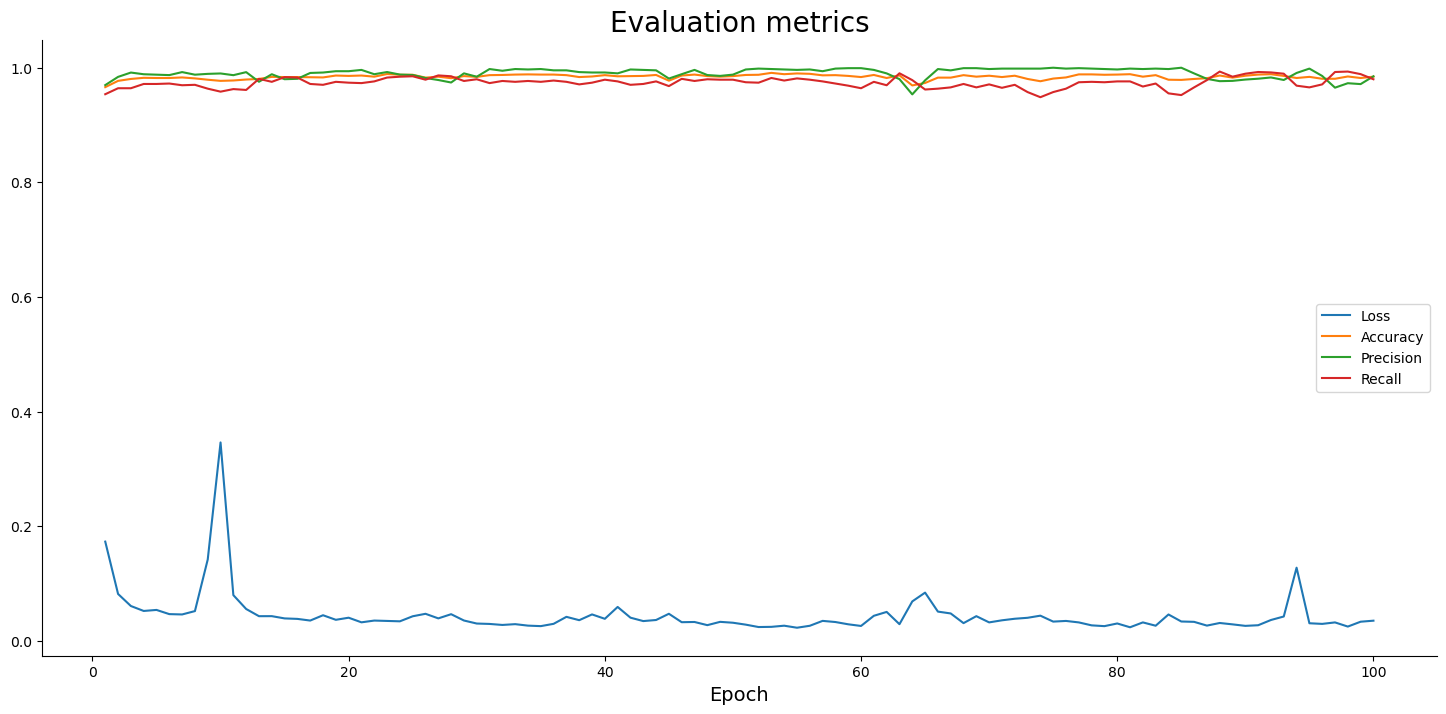

In [10]:
plt.plot(
    np.arange(1, 101), 
    history.history['loss'], label='Loss'
)
plt.plot(
    np.arange(1, 101), 
    history.history['accuracy'], label='Accuracy'
)
plt.plot(
    np.arange(1, 101), 
    history.history['precision'], label='Precision'
)
plt.plot(
    np.arange(1, 101), 
    history.history['recall'], label='Recall'
)
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

We can now evaluate the model on the test data to obtain predictions.

In [11]:
predictions = model.predict(X_test_scaled)

24/24 [==============================] - 0s 651us/step


We binarise out continuos predictions with a given threshold

In [13]:
binary_predictions =[]
for p in predictions:
    if p>0.5:
        binary_predictions.append(1)
    else:
        binary_predictions.append(0)

The confusion matrix tells us the number of false and true positives/negatives

In [16]:
print(confusion_matrix(Y_test, binary_predictions))

[[406   5]
 [  6 336]]


We can output our predictions metrics

In [20]:
print(f'Accuracy: {accuracy_score(Y_test, binary_predictions):.2f}')
print(f'Precision: {precision_score(Y_test, binary_predictions):.2f}')
print(f'Recall: {recall_score(Y_test, binary_predictions):.2f}')

Accuracy: 0.99
Precision: 0.99
Recall: 0.98
